# Setup

In [1]:
# https://docs.doubleml.org/stable/guide/models.html#models
import numpy as np
import pandas as pd

import doubleml as dml
import statsmodels.api as sm
from linearmodels.panel.utility import generate_panel_data

from doubleml.datasets import (
    make_plr_CCDDHNR2018, #Linear Regression
    make_pliv_CHS2015, #Instrumental variables
    make_did_SZ2020, #DiD,
    make_pliv_multiway_cluster_CKMS2021 #Panel Data
)
from sklearn.ensemble import RandomForestRegressor

from sklearn.base import clone

# Main imports
from econml.panel.dml import DynamicDML
#from econml.tests.dgp import DynamicPanelDGP, add_vlines

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.base import clone
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

from linearmodels.iv import IV2SLS

%matplotlib inline


/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/master_thesis/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [166]:
import sys
sys.path.append('/Applications/Stata/utilities')
from pystata import config
config.init('se')

from pystata import stata

# Linear Regression

In [28]:
data = make_plr_CCDDHNR2018(alpha=2.3, n_obs=500, dim_x=200, return_type='DataFrame')

In [25]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,y,d
0,0.276635,-0.720278,0.101608,-1.789348,-1.262242,-0.725856,-1.733522,-1.420931,-1.268064,-0.736857,...,-1.209597,-1.479687,-0.437485,-0.519956,-0.503895,-1.659124,-1.652355,-0.628515,-2.715427,-1.393454
1,-0.623535,-1.169003,0.156426,0.312355,-0.314469,-0.918031,-1.282437,-0.685352,-0.694955,-0.816678,...,-0.639745,-0.010369,-0.411173,-1.459028,-0.864855,0.425885,0.424181,-0.619681,-3.351562,-1.580173
2,0.378250,0.926645,1.527170,1.160710,0.470038,-0.825889,0.421776,0.990955,0.194563,1.041780,...,0.228854,-0.338428,0.090475,0.213726,-0.175072,-0.850744,-0.520784,0.182247,-1.290786,-0.406860
3,1.704088,1.108100,2.099838,1.610821,1.288136,1.361578,0.590624,0.612934,0.975576,0.886818,...,-0.295410,-1.683786,-0.369684,-0.140550,0.158138,0.808327,0.569172,0.499800,3.136952,0.331149
4,-0.934718,-0.322487,-0.911037,-0.732112,-1.093388,-0.746964,-0.116690,0.520089,0.487393,1.373231,...,1.626955,1.287057,0.814563,0.422016,0.257869,0.851074,0.444223,0.554338,-2.032174,-1.157256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.380033,-0.802889,-1.309383,-1.025638,-1.265011,-1.949929,-1.686654,-0.844583,-0.474273,0.179260,...,-1.442146,-1.619833,-0.608550,1.350592,0.248132,0.511698,0.049173,1.064292,-0.640281,-0.231301
496,1.525379,-0.009588,0.207880,0.248696,0.117199,0.765520,-0.003265,-0.030637,-0.059333,-0.323370,...,-2.021165,-1.584951,-1.234349,-0.608908,0.154735,-0.286717,0.148276,-1.297455,4.343490,1.371868
497,1.253350,1.864765,2.345298,1.813908,0.612542,1.270288,1.008408,0.736807,0.453471,1.139381,...,-0.050776,-0.850711,-0.881007,-0.187970,1.059047,0.969704,0.933287,-0.112447,2.626959,1.427388
498,-1.289194,-1.635780,-0.879949,0.030348,1.059079,0.946572,0.978748,0.453448,-0.584268,0.208024,...,0.560982,0.417661,-0.014869,-1.237953,-2.159375,-2.185896,-2.367092,-2.183732,-0.597217,-0.074367


In [30]:
# Fit the OLS regression model
dependent_var = "y"
independent_vars = ["d"] + [col for col in data.columns if col not in ["y", "d"]]
model = sm.OLS(data[dependent_var], data[independent_vars])
results = model.fit()

# Generate a statistical summary table
summary_table = results.summary()
print(summary_table)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              25.12
Date:                Thu, 01 Feb 2024   Prob (F-statistic):                   5.56e-119
Time:                        17:22:38   Log-Likelihood:                         -662.95
No. Observations:                 500   AIC:                                      1728.
Df Residuals:                     299   BIC:                                      2575.
Df Model:                         201                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
learner = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

ml_l = clone(learner)

ml_m = clone(learner)

np.random.seed(1111)

obj_dml_data = dml.DoubleMLData(data, 'y', 'd')

dml_plr_obj = dml.DoubleMLPLR(obj_dml_data, ml_l, ml_m)

print(dml_plr_obj.fit())


================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['d']
Covariates: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X11

# Instrumental Variables

# Panel Data

- DoubleML DGP for clustered data

In [16]:
dim_X = 300
cluster_col = 'cluster_var_i'
exog=["X"+str(i) for i in range(1, dim_X+1)]
df_panel = make_pliv_multiway_cluster_CKMS2021(N=100, M=5, dim_X=dim_X, theta=1.0).data
df_panel

,cluster_var_i,cluster_var_j,X1,X2,X3,X4,X5,X6,X7,X8,...,X294,X295,X296,X297,X298,X299,X300,Y,D,Z
0,0,0,-0.395788,-0.609405,-0.253193,-1.141371,0.125261,-0.125999,-0.721955,0.252589,...,0.367001,-0.413828,-0.404348,-0.840032,0.262785,0.533642,0.471471,-0.389850,0.392272,-0.302291
1,0,1,0.516774,-0.114745,0.153125,-0.176441,0.291564,-0.675461,0.234778,-0.035772,...,1.016818,0.572915,0.456376,-0.516129,1.086990,-0.062765,0.316674,1.770727,1.163322,0.614165
2,0,2,-1.394983,-0.762153,-0.351721,0.944757,0.567550,0.262966,-0.703084,-1.313640,...,-0.730198,1.041418,-0.065639,0.172140,-0.160877,-0.174963,0.769403,-2.072254,-0.450693,-0.188351
3,0,3,-1.009805,-0.020880,-0.649135,-0.044545,-0.872471,-0.204972,-0.530023,0.373530,...,0.951384,0.953090,0.447353,-1.153958,-0.198907,-0.169720,-0.013050,-3.394803,-2.102336,-1.004632
4,0,4,0.304911,-0.773221,-0.464251,-0.441349,0.852999,-0.365642,-0.347175,-0.228217,...,0.475182,0.470736,-0.410281,-0.752955,-0.133355,-0.369838,-0.430627,-1.461116,-0.523716,0.015179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,99,0,0.390718,-0.798307,0.687463,-0.346664,0.193909,0.836362,0.620091,1.006486,...,0.700168,0.142593,0.163388,0.118602,0.429395,0.107030,0.045261,0.509092,0.070766,0.411331
496,99,1,0.026814,0.429395,1.144535,0.994883,0.455771,0.091228,1.081054,0.470594,...,0.155096,0.720664,0.862855,0.028848,-0.429755,-0.860451,-0.106476,0.233015,-0.279056,-0.587546
497,99,2,-0.534051,0.012379,0.965112,0.369480,-0.346564,0.255653,-0.203751,-0.871643,...,0.427843,0.221641,-0.255025,0.367512,-0.023059,0.183198,-0.203244,-1.595308,-0.816724,-0.617457
498,99,3,0.060218,-0.359769,1.134983,0.170334,0.572666,0.057137,-0.726468,1.539835,...,0.725675,0.432612,-0.367493,0.226738,-1.008934,0.504122,-0.305340,0.265816,-0.445514,-0.129112


In [11]:
# Generate dummy columns using pd.get_dummies()
dummy_columns = pd.get_dummies(df_panel['cluster_var_i'], prefix='individual', dtype=int)

# Concatenate the dummy columns with the original DataFrame
df_with_dummies = pd.concat([df_panel, dummy_columns], axis=1)

# Concatenate the dummy columns with the original DataFrame
dummy_columns = pd.get_dummies(df_panel['cluster_var_j'], prefix='time', dtype=int)
df_with_dummies = pd.concat([df_with_dummies, dummy_columns], axis=1)
df_with_dummies

individual_columns = [column for column in df_with_dummies.columns if column.split("_")[0] == "individual"]
time_columns = [column for column in df_with_dummies.columns if column.split("_")[0] == "time"]
instrument_columns = [column for column in df_with_dummies.columns if column.split("_")[0] == "instrument"]

# Compute first differences for all variables
df_with_dummies.set_index(['cluster_var_i', 'cluster_var_j'], inplace=True)
df_with_diff = df_with_dummies.groupby(level='cluster_var_i').diff().dropna()

df_with_diff = df_with_diff.reset_index()

In [17]:
obj_dml_data = dml.DoubleMLClusterData(df_panel, y_col="Y", x_cols=exog, d_cols="D", z_cols="Z", cluster_cols='cluster_var_i')

In [18]:
learner_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=20, learning_rate=0.01)

ml_l_boosting = clone(learner_boosting)
ml_m_boosting = clone(learner_boosting)
ml_r_boosting = clone(learner_boosting)

# For boosting
dml_pliv_obj_boosting = dml.DoubleMLPLIV(obj_dml_data, ml_l_boosting, ml_m_boosting, ml_r_boosting)

dml_pliv_obj_boosting.fit().summary  # Fit and show summary for boosting

,coef,std err,t,P>|t|,2.5 %,97.5 %
D,1.135866,0.093156,12.19321,3.378457e-34,0.953285,1.318448


In [167]:
# Calculate the first differences
panel_ols_data = df_panel.data.set_index([cluster_col, 'cluster_var_j'])
df_diff = panel_ols_data.groupby(level=cluster_col).diff().dropna()
#df_diff = panel_ols_data

# Define the dependent and independent variables for the regression
# For example, we regress 'Y' on 'D' and 'X1'
exog_vars = df_diff[exog]
endogenous = df_diff[['D']]
dependent = df_diff['Y']
instrument = df_diff['Z']

# Fit the PanelOLS model using first differences
# model = PanelOLS(dependent, exog_vars, entity_effects=False)
# results = model.fit()
# Print the results from PanelOLS
# print(results)

# Perform the IV regression with clustered standard errors
iv_model = IV2SLS(dependent=dependent, endog=endogenous, exog=exog_vars, instruments=instrument).fit(cov_type='clustered', clusters=df_diff.index.get_level_values(cluster_col))

# Print the regression results
#print(iv_model.summary)

# Extract results for the endogenous variable 'D'
endog_var = 'D'
results = iv_model.params.loc[endog_var]
std_err = iv_model.std_errors.loc[endog_var]
t_stat = iv_model.tstats.loc[endog_var]
p_value = iv_model.pvalues.loc[endog_var]
ci_lower, ci_upper = iv_model.conf_int().loc[endog_var]

# Create a DataFrame with these statistics in a single row
results_df = pd.DataFrame({
    'Coefficient': [results],
    'Standard Error': [std_err],
    't-Statistic': [t_stat],
    'p-value': [p_value],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})

# Display the DataFrame
results_df

,Coefficient,Standard Error,t-Statistic,p-value,95% CI Lower,95% CI Upper
0,1.016927,0.01701,59.785531,0.0,0.983589,1.050265


- Traditional example with Stata

In [195]:
df_math = pd.read_stata("/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/master_thesis/data/mymeap_ch2.dta", convert_dates=False)
df_math

,distid,schid,lunch,enrol,exppp,year,cpi,rexppp,lrexppp,lenrol,lenrolsq,math4
0,34010.0,1,35.000000,248,2870,1994,1.482,3108.198486,8.041799,5.513429,30.397896,59.837444
1,34010.0,1,36.590000,244,4176,1995,1.524,4397.953125,8.388894,5.497168,30.218857,68.370354
2,34010.0,1,40.549999,247,4333,1996,1.569,4432.418945,8.396701,5.509388,30.353361,64.383919
3,34010.0,1,49.490002,291,3666,1997,1.605,3666.000000,8.206857,5.673323,32.186596,69.927261
4,34010.0,1,49.639999,274,3825,1998,1.630,3766.334473,8.233857,5.613128,31.507208,71.291817
...,...,...,...,...,...,...,...,...,...,...,...,...
7141,82010.0,7657,56.910000,208,4706,1998,1.630,4633.822266,8.441137,5.337538,28.489315,69.067871
7142,47080.0,7720,10.900000,469,3619,1995,1.524,3811.348633,8.245738,6.150603,37.829914,79.299316
7143,47080.0,7720,10.260000,497,3739,1996,1.569,3824.790039,8.249259,6.208590,38.546589,83.668633
7144,47080.0,7720,9.430000,530,4021,1997,1.605,4021.000000,8.299286,6.272877,39.348988,78.292953


In [169]:
stata.pdataframe_to_data(df_math, force=True)

stata.run('''
    xtset schid year, yearly
    
    ** generate yearly dummies
    tab year, gen(y)
    
    ** global yxvars math4 lrexppp lunch lenrol
    global yxvars math4 lrexppp lunch lenrol lenrolsq
''')


. 
.     xtset schid year, yearly

Panel variable: schid (unbalanced)
 Time variable: year, 1994 to 1998, but with gaps
         Delta: 1 year

.     
.     ** generate yearly dummies
.     tab year, gen(y)

       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1994 |      1,011       14.15       14.15
       1995 |      1,205       16.86       31.01
       1996 |      1,634       22.87       53.88
       1997 |      1,634       22.87       76.74
       1998 |      1,662       23.26      100.00
------------+-----------------------------------
      Total |      7,146      100.00

.     
.     ** global yxvars math4 lrexppp lunch lenrol
.     global yxvars math4 lrexppp lunch lenrol lenrolsq

. 


In [170]:
stata.run('''
    xtreg $yxvars y2-y5, fe
''')


. 
.     xtreg $yxvars y2-y5, fe



Fixed-effects (within) regression               Number of obs     =      7,146
Group variable: schid                           Number of groups  =      1,683

R-squared:                                      Obs per group:
     Within  = 0.3811                                         min =          1
     Between = 0.3064                                         avg =        4.2
     Overall = 0.3067                                         max =          5

                                                F(8,5455)         =     419.91
corr(u_i, Xb) = -0.5603                         Prob > F          =     0.0000

------------------------------------------------------------------------------
       math4 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     lrexppp |   1.926256   .5955264     3.23   0.001     .7587869    3.093726
       lunch |  -.2023922   .0111158   -18.21   0.000    -.22418

- Using EconML DynamicDML

In [ ]:
# https://cran.r-project.org/web/packages/dynamite/vignettes/dynamite_simulation.html ????

In [171]:
df_math

,distid,schid,lunch,enrol,exppp,year,cpi,rexppp,lrexppp,lenrol,lenrolsq,math4
0,34010.0,1,35.000000,248,2870,1994,1.482,3108.198486,8.041799,5.513429,30.397896,59.837444
1,34010.0,1,36.590000,244,4176,1995,1.524,4397.953125,8.388894,5.497168,30.218857,68.370354
2,34010.0,1,40.549999,247,4333,1996,1.569,4432.418945,8.396701,5.509388,30.353361,64.383919
3,34010.0,1,49.490002,291,3666,1997,1.605,3666.000000,8.206857,5.673323,32.186596,69.927261
4,34010.0,1,49.639999,274,3825,1998,1.630,3766.334473,8.233857,5.613128,31.507208,71.291817
...,...,...,...,...,...,...,...,...,...,...,...,...
7141,82010.0,7657,56.910000,208,4706,1998,1.630,4633.822266,8.441137,5.337538,28.489315,69.067871
7142,47080.0,7720,10.900000,469,3619,1995,1.524,3811.348633,8.245738,6.150603,37.829914,79.299316
7143,47080.0,7720,10.260000,497,3739,1996,1.569,3824.790039,8.249259,6.208590,38.546589,83.668633
7144,47080.0,7720,9.430000,530,4021,1997,1.605,4021.000000,8.299286,6.272877,39.348988,78.292953


In [196]:
balanced_panel = pd.DataFrame(df_math["schid"].value_counts() == 5).reset_index()
balanced_panel.columns = ['schid', 'count']
balanced_panel = balanced_panel.loc[balanced_panel["count"] == True, "schid"].tolist()
#balanced_panel = balanced_panel.loc[balanced_panel]

In [197]:
# Add lag values for ly, ln, and lk columns
#lag_periods = 1  # You can change this to the desired lag period
treatment_variable = "lenrol"
target_variable = "math4"
group_var = "schid"
explanatory_variables = ["lrexppp","lunch","lenrol","lenrolsq", "year"]


df_math_balanced = df_math.loc[df_math["schid"].isin(balanced_panel), :]
# Drop rows with NaN values introduced by the shift
df_math_balanced.dropna(inplace=True)


Y = df_math_balanced[target_variable].values
W = df_math_balanced[explanatory_variables].values
T = df_math_balanced[treatment_variable].values
groups = df_math_balanced[group_var].values


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [203]:
est = DynamicDML(
    model_y=LassoCV(cv=3, max_iter=1000), 
    model_t=LassoCV(cv=3, max_iter=1000), 
    cv=3)

est.fit(Y, T, X=None, W=W, groups=groups, cache_values=True)

In [200]:
print(est.ate())

1.3013798052333523


In [210]:
est.residuals_[0]

array([ 0.27386475, -0.32337189, -0.34056091, ...,  1.44582367,
        0.71579742,  0.43719482])

- DoubleML for Panel Data

In [211]:
import numpy as np
from doubleml import DoubleMLData

np.random.seed(42)
#n_obs = 1000
#x, y, d = make_did_SZ2020(n_obs=n_obs, dgp_type=4, cross_sectional_data=False, return_type='array')
dml_data = DoubleMLData.from_arrays(x=W, y=Y, d=T)
print(dml_data)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['d']
Covariates: ['X1', 'X2', 'X3', 'X4', 'X5']
Instrument variable(s): None
No. Observations: 4605

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Columns: 7 entries, X1 to d
dtypes: float32(7)
memory usage: 126.0 KB



In [6]:
from doubleml import DoubleMLClusterData, DoubleMLData, DoubleMLPLIV
import numpy as np
from doubleml.datasets import make_pliv_multiway_cluster_CKMS2021

# Set the simulation parameters
N = 25  # number of observations (first dimension)
M = 25  # number of observations (second dimension)
dim_X = 100  # dimension of X
np.random.seed(3141) # set seed

obj_dml_data = make_pliv_multiway_cluster_CKMS2021(N, M, dim_X,
                                                   omega_X=np.array([0.25, 0]),
                                                   omega_epsilon=np.array([0.25, 0]),
                                                   omega_v=np.array([0.25, 0]),
                                                   omega_V=np.array([0.25, 0]))

In [7]:
obj_dml_data.cluster_cols = 'cluster_var_i'
print(obj_dml_data)

================== DoubleMLClusterData Object ==================

------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): ['D']
Cluster variable(s): ['cluster_var_i']
Covariates: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100']
Instrument variable(s): ['Z']
No. Observations: 625

------------------ DataFrame inf

In [8]:
obj_dml_data.data

,cluster_var_i,cluster_var_j,X1,X2,X3,X4,X5,X6,X7,X8,...,X94,X95,X96,X97,X98,X99,X100,Y,D,Z
0,0,0,-0.475151,-0.215540,-0.148600,0.588210,0.418296,-0.369178,-0.029443,1.918346,...,-0.747627,-1.299345,-1.272419,0.298940,-0.704974,-0.222724,-0.582398,-0.006812,-0.153799,-0.056638
1,0,1,-0.897483,-0.657003,0.739847,-0.733563,-1.044947,-0.396564,1.016662,0.453320,...,0.108376,0.274417,0.455594,-0.629772,-0.958817,-0.522118,0.953234,-1.436345,-0.750909,-1.133177
2,0,2,-0.538107,-1.136892,0.855668,-0.670508,-0.857284,0.064694,-0.347560,-0.890964,...,0.226899,-0.646471,-1.859076,-0.540651,-0.462071,-0.663697,-0.039395,-1.970674,-0.800392,0.367294
3,0,3,-0.264802,1.153754,0.361720,0.606381,0.329613,0.830251,1.145913,-0.365614,...,0.217430,1.329220,-1.332179,-0.972999,-0.672313,-0.352385,-1.174399,0.232657,-0.004656,0.038022
4,0,4,-0.486005,-0.662633,-0.093786,-0.778095,0.293908,-0.529488,0.154199,0.886935,...,-0.264785,-0.240024,-0.907491,0.468823,0.465454,-1.093344,-1.129138,-2.460466,-2.161643,-0.790720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,24,20,-0.312378,0.350902,0.482781,0.796349,-0.015823,-0.190551,-0.536652,-1.134124,...,0.590250,0.021743,0.842076,-0.255630,-0.711915,-0.290016,0.121397,-2.839926,-2.034389,0.560607
621,24,21,0.050030,-0.041548,0.474736,-0.241357,0.745449,0.251987,0.578250,-0.138152,...,0.824425,1.443298,1.586584,0.939375,0.778898,0.503683,-0.442247,0.160066,-0.397971,-0.932012
622,24,22,-0.387253,-0.152584,-0.450049,-0.991138,-0.307577,0.360463,-0.856748,-0.966626,...,1.039988,0.279516,-1.718001,-0.156322,-0.172977,-0.581609,-0.261216,-0.597524,-0.626338,-0.524935
623,24,23,0.381529,-0.147298,-0.279095,-0.748342,-1.622381,-0.304793,1.262230,1.047196,...,-0.296881,-0.592721,0.753798,-0.002950,-0.364442,0.347739,-0.227880,0.806364,-0.130058,-0.152682


In [214]:
from doubleml import DoubleMLDID

learner = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)

ml_g = clone(learner)
ml_m = clone(learner)

np.random.seed(1111)

dml_did = DoubleMLDID(dml_data,
                      ml_g=ml_g,
                      ml_m=ml_m,
                      score='observational',
                      in_sample_normalization=True,
                      n_folds=5)

dml_did.fit()
print(dml_did)


ValueError: Incompatible data. To fit an DID model with DML exactly one binary variable with values 0 and 1 needs to be specified as treatment variable.

- Simulated dynamic panel data DGP

In [160]:
from panel_data_dgp import DynamicPanelDGP

# Define DGP parameters
np.random.seed(123)
n_panels = 5000 # number of panels
n_periods = 8 # number of time periods in each panel
n_treatments = 1 # number of treatments in each period
n_x = 21 # number of features + controls
s_x = 5 # number of controls (endogeneous variables)
s_t = 5 # treatment support size

# Define additional DGP parameters
het_strength = .5
het_inds = np.arange(n_x - n_treatments, n_x)

# Generate data
dgp = DynamicPanelDGP(n_periods, n_treatments, n_x).create_instance(
            s_x, hetero_strength=het_strength, hetero_inds=het_inds, random_seed=12)
Y, T, X, W, groups = dgp.observational_data(n_panels, s_t=s_t, random_seed=1)
true_effect = dgp.true_effect
ate_effect = dgp.true_effect
het_effect = dgp.true_hetero_effect[:, het_inds + 1]



In [163]:
X

array([[-0.88049534],
       [ 1.28833929],
       [ 1.001325  ],
       ...,
       [ 0.36874386],
       [-0.24613051],
       [ 0.12244789]])

In [161]:
len(W[0])

20

In [3]:
est = DynamicDML(
    model_y=LassoCV(cv=3, max_iter=1000), 
    model_t=MultiTaskLassoCV(cv=3, max_iter=1000), 
    cv=3)

est.fit(Y, T, X=None, W=W, groups=groups)

In [12]:
conf_ints = est.intercept__interval(alpha=0.05)

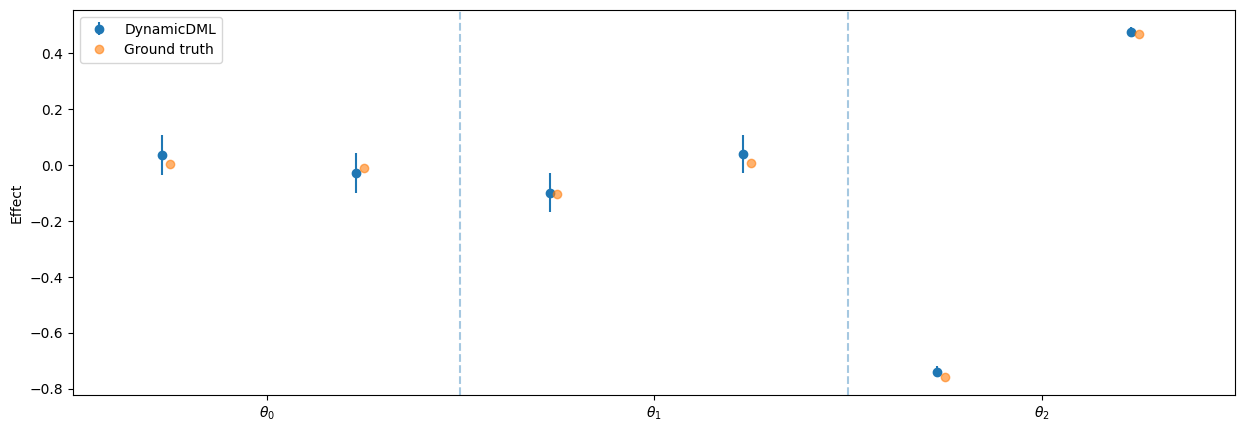

In [15]:
# Some plotting boilerplate code
plt.figure(figsize=(15, 5))
plt.errorbar(np.arange(n_periods*n_treatments)-.04, est.intercept_, yerr=(conf_ints[1] - est.intercept_,
                                                    est.intercept_ - conf_ints[0]), fmt='o', label='DynamicDML')
plt.errorbar(np.arange(n_periods*n_treatments), true_effect.flatten(), fmt='o', alpha=.6, label='Ground truth')
for t in np.arange(1, n_periods):
    plt.axvline(x=t * n_treatments - .5, linestyle='--', alpha=.4)
plt.xticks([t * n_treatments - .5 + n_treatments/2 for t in range(n_periods)],
           ["$\\theta_{}$".format(t) for t in range(n_periods)])
plt.gca().set_xlim([-.5, n_periods*n_treatments - .5])
plt.ylabel("Effect")
plt.legend()
plt.show()

In [79]:
df_blundbond = pd.read_stata("/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/econometrics/microeconometrics_i/data/blundbondbalanc 2.dta", convert_dates=False)

In [8]:
df_blundbond

,id,ly,ln,lk,year,D83,D84,D85,D86,D87,D88,D89
0,886,4.579228,3.480440,3.254327,1982.0,0,0,0,0,0,0,0
1,886,4.472189,3.357781,3.346090,1983.0,1,0,0,0,0,0,0
2,886,4.567035,3.360103,3.485277,1984.0,0,1,0,0,0,0,0
3,886,4.885006,3.315239,3.667849,1985.0,0,0,1,0,0,0,0
4,886,4.999058,3.380052,3.831042,1986.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3931,989349,7.450092,5.983883,6.155892,1985.0,0,0,1,0,0,0,0
3932,989349,7.576933,5.971417,6.210421,1986.0,0,0,0,1,0,0,0
3933,989349,7.767560,5.923970,6.297313,1987.0,0,0,0,0,1,0,0
3934,989349,7.856476,6.002237,6.334439,1988.0,0,0,0,0,0,1,0


In [7]:
import sys
sys.path.append('/Applications/Stata/utilities')
from pystata import config
config.init('se')

from pystata import stata


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 15 Oct 2024
Serial number: 401809305874
  Licensed to: Gabriel Dias Medeiros Pereira
               ISEG

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [ ]:
stata.run(
    ''' 
    ssc install xtabond2, replace    
    '''
)

In [74]:
stata.pdataframe_to_data(df_blundbond, force=True)

- Example with Blundell & Bond data on stata

In [11]:
##Blundell & Bond 
##one-step GMM, robust s.e., predetermined Variables 

stata.run('''
    xtset id year, yearly
    xtabond2 ly l.ly ln l.ln lk l.lk D85-D89, iv(D85-D89) gmm(l.ly) gmm(ln lk) robust
''')


. 
.     xtset id year, yearly



Panel variable: id (strongly balanced)
 Time variable: year, 1982 to 1989
         Delta: 1 year

.     xtabond2 ly l.ly ln l.ln lk l.lk D85-D89, iv(D85-D89) gmm(l.ly) gmm(ln lk
> ) robust
Favoring space over speed. To switch, type or click on mata: mata set matafavor
>  speed, perm.
  Using a generalized inverse to calculate robust weighting matrix for Hansen t
> est.
  Difference-in-Sargan/Hansen statistics may be negative.

Dynamic panel-data estimation, one-step system GMM
------------------------------------------------------------------------------
Group variable: id                              Number of obs      =      3444
Time variable : year                            Number of groups   =       492
Number of instruments = 101                     Obs per group: min =         7
Wald chi2(10) =  3.94e+06                                      avg =      7.00
Prob > chi2   =     0.000                                      max =         7
-------------------------------------------

In [38]:
len(W)

50000

In [42]:
groups[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
W[:10]

array([[ 1.29947629, -0.48940513, -0.4225374 , -0.8583749 ],
       [-0.22581437, -0.15757064,  0.0059031 ,  0.79488431],
       [ 1.00087438, -1.02095589,  0.00519972, -0.73488575],
       [ 1.1164316 ,  0.37388386,  0.52093862,  0.50844446],
       [-0.47243922,  0.88001641, -0.81420735,  0.11521185],
       [ 0.20593092, -0.99558601,  0.31496389,  1.08880484],
       [-0.91041464,  1.48845784, -0.18653783, -0.0793983 ],
       [ 0.01974842,  0.9559279 , -0.74383931, -0.49959892],
       [ 0.81995509,  0.765645  ,  0.23749216,  0.51823139],
       [-0.5837222 ,  0.98144117, -0.43200264,  1.40369369]])

In [47]:
Y[:10]

array([-0.08850398, -1.86406155, -1.3423573 ,  2.84532782, -1.67414788,
        1.58155117,  1.36421373, -0.78737777,  2.97397899,  4.24325403])

In [45]:
T[:10]

array([[-0.92928438],
       [-1.30599927],
       [-0.61846121],
       [ 1.89140216],
       [-1.33410703],
       [ 1.0348769 ],
       [ 1.5790885 ],
       [-0.62477107],
       [ 2.33289575],
       [ 3.59926314]])

In [44]:
X[:10]

array([[ 0.6923261 ],
       [-1.56219308],
       [-0.16010127],
       [-0.56685128],
       [-0.62008589],
       [ 0.51668104],
       [ 0.21685386],
       [-0.25256204],
       [-0.63486197],
       [ 1.13706541]])

In [76]:
df_blundbond

,id,ly,ln,lk,year,D83,D84,D85,D86,D87,D88,D89
0,886,4.579228,3.480440,3.254327,1982.0,0,0,0,0,0,0,0
1,886,4.472189,3.357781,3.346090,1983.0,1,0,0,0,0,0,0
2,886,4.567035,3.360103,3.485277,1984.0,0,1,0,0,0,0,0
3,886,4.885006,3.315239,3.667849,1985.0,0,0,1,0,0,0,0
4,886,4.999058,3.380052,3.831042,1986.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3931,989349,7.450092,5.983883,6.155892,1985.0,0,0,1,0,0,0,0
3932,989349,7.576933,5.971417,6.210421,1986.0,0,0,0,1,0,0,0
3933,989349,7.767560,5.923970,6.297313,1987.0,0,0,0,0,1,0,0
3934,989349,7.856476,6.002237,6.334439,1988.0,0,0,0,0,0,1,0


- Example on EconML

In [142]:
df_blundbond = pd.read_stata("/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/econometrics/microeconometrics_i/data/blundbondbalanc 2.dta", convert_dates=False)

In [143]:
# Add lag values for ly, ln, and lk columns
lag_periods = 1  # You can change this to the desired lag period
treatment_variable = "ln"
target_variable = "ly"
group_var = "id"

df_blundbond['l_ly'] = df_blundbond.groupby('id')['ly'].shift(lag_periods)
df_blundbond['l_ln'] = df_blundbond.groupby('id')['ln'].shift(lag_periods)
df_blundbond['l_lk'] = df_blundbond.groupby('id')['lk'].shift(lag_periods)

# Drop rows with NaN values introduced by the shift
df_blundbond.dropna(inplace=True)

#df_blundbond = df_blundbond.dropna()

Y = df_blundbond[target_variable].values
W = df_blundbond.drop(columns=[treatment_variable]+[target_variable, group_var]).values
T = df_blundbond[treatment_variable].values
groups = df_blundbond['id'].values

In [130]:
########## 
### Multiple treatments
##########

lag_periods = 1
target_variable = "ly"
treatment_variable = ["ln", "lk", "l_ly", "l_ln", "l_lk"]
group_var = "id"

df_blundbond['l_ly'] = df_blundbond.groupby('id')['ly'].shift(lag_periods)
df_blundbond['l_ln'] = df_blundbond.groupby('id')['ln'].shift(lag_periods)
df_blundbond['l_lk'] = df_blundbond.groupby('id')['lk'].shift(lag_periods)

# Drop rows with NaN values introduced by the shift
df_blundbond.dropna(inplace=True)

#df_blundbond = df_blundbond.dropna()

Y = df_blundbond[target_variable].values
W = df_blundbond.drop(columns=treatment_variable+[target_variable, group_var]).values
T = df_blundbond[treatment_variable].values
groups = df_blundbond['id'].values

In [109]:
df_blundbond

,id,ly,ln,lk,year,D83,D84,D85,D86,D87,D88,D89,l_ly,l_ln,l_lk
3,886,4.885006,3.315239,3.667849,1985.0,0,0,1,0,0,0,0,4.567035,3.360103,3.485277
4,886,4.999058,3.380052,3.831042,1986.0,0,0,0,1,0,0,0,4.885006,3.315239,3.667849
5,886,5.117173,3.489483,4.032521,1987.0,0,0,0,0,1,0,0,4.999058,3.380052,3.831042
6,886,5.152914,3.633525,4.182161,1988.0,0,0,0,0,0,1,0,5.117173,3.489483,4.032521
7,886,5.199434,3.803367,4.287753,1989.0,0,0,0,0,0,0,1,5.152914,3.633525,4.182161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,989349,7.450092,5.983883,6.155892,1985.0,0,0,1,0,0,0,0,7.542062,5.987605,6.111824
3932,989349,7.576933,5.971417,6.210421,1986.0,0,0,0,1,0,0,0,7.450092,5.983883,6.155892
3933,989349,7.767560,5.923970,6.297313,1987.0,0,0,0,0,1,0,0,7.576933,5.971417,6.210421
3934,989349,7.856476,6.002237,6.334439,1988.0,0,0,0,0,0,1,0,7.767560,5.923970,6.297313


In [83]:
# est = DynamicDML(
#     model_y=LassoCV(cv=3, max_iter=1000), 
#     model_t=LassoCV(cv=3, max_iter=1000), 
#     cv=3)

# est.fit(Y, T, X=None, W=W, groups=groups)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e-01, tolerance: 1.357e-01


In [60]:
conf_ints = est.intercept__interval(alpha=0.05)

In [144]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
   # 'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

random_forest_model_cv = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,  # Cross-validation folds
    verbose=0,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Create the DynamicDML estimator
est = DynamicDML(
    model_y=random_forest_model_cv,
    model_t=random_forest_model_cv,
    cv=3
)

In [145]:
est.fit(Y, T, X=None, W=W, groups=groups, inference="auto")

In [151]:
print(est.ate_inference())

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.661       0.117 5.645    0.0         0.431          0.89
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
      0.0           0.661           0.661
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.117          0.431           0.89
------------------------------------------


In [147]:
est.intercept_

array([ 0.22932892, -0.00607372,  0.01415113,  0.03830084, -0.01305194,
        0.00393803,  0.3941389 ])

In [138]:
# Period treatment effects + interpretation
for i, theta in enumerate(est.intercept_.reshape(-1, n_treatments)):
    print(f"Marginal effect of a treatments in period {i+1} on period {n_periods} outcome: {theta}")

ValueError: cannot reshape array of size 35 into shape (4)

In [149]:
print(est.summary())

Coefficient Results:  X is None, please call intercept_inference to learn the constant!
                            CATE Intercept Results                           
                        point_estimate stderr zstat  pvalue ci_lower ci_upper
-----------------------------------------------------------------------------
cate_intercept|(T0)$_0$          0.229   0.14  1.642  0.101   -0.044    0.503
cate_intercept|(T0)$_1$         -0.006  0.114 -0.053  0.957   -0.229    0.217
cate_intercept|(T0)$_2$          0.014  0.101   0.14  0.888   -0.183    0.212
cate_intercept|(T0)$_3$          0.038  0.117  0.328  0.743   -0.191    0.267
cate_intercept|(T0)$_4$         -0.013  0.121 -0.108  0.914   -0.251    0.225
cate_intercept|(T0)$_5$          0.004  0.086  0.046  0.963   -0.165    0.172
cate_intercept|(T0)$_6$          0.394  0.047  8.453    0.0    0.303    0.486
-----------------------------------------------------------------------------

<sub>A linear parametric conditional average treatmen

# Chernozhukov DGP example

- Working DGP version

In [51]:
# Chernozhukov High-Dimensional Panel Data DGP
def generate_data(n, T, alpha, num_instruments=None):
    # Parameters
    rho_epsilon = 0.8
    rho_u = 0.8
    rho_z = 0.8
    rho_v = 0.5
    alpha = alpha

    if num_instruments:
        num_instruments = num_instruments
    else:
        num_instruments= n * (T - 2)

    print(f"Num instruments: {num_instruments}")

    s = np.ceil(0.5 * n**(1/3)).astype(int)
    
    # Generate disturbances
    epsilon = np.zeros((n, T))
    u = np.zeros((n, T))
    for i in range(n):
        for t in range(1, T):
            cov_matrix = np.array([[1, rho_v], [rho_v, 1]])
            residuals = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix)
            epsilon[i, t] = rho_epsilon * epsilon[i, t-1] + residuals[0]
            u[i, t] = rho_u * u[i, t-1] + residuals[1]
    
    # Generate individual heterogeneity (fixed effects)
    mean_e = np.zeros(n)
    cov_e = 0.5 ** np.abs(np.subtract.outer(np.arange(n), np.arange(n)))
    e = np.random.multivariate_normal(mean=mean_e, cov=cov_e) * (4 / T)**0.5
    
    # Design of coefficients on the instruments
    pi1 = np.zeros(num_instruments)
    for j in range(1, num_instruments + 1):
        if j <= s:
            pi1[j-1] = (-1)**(j-1) * (1 / np.sqrt(s))
        else:
            pi1[j-1] = (-1)**(j-1) * (1 / j**2)
    
    # Generate instruments
    z = np.zeros((n, T, num_instruments))
    for i in range(n):
        for t in range(T):
            phi_t = np.random.normal(scale=np.sqrt(1), size=num_instruments)
            for j in range(num_instruments):
                if t == 0:
                    z[i, t, j] = e[i] / (1 - rho_z) + np.sqrt(1 / (1 - rho_z**2)) * phi_t[j]
                else:
                    z[i, t, j] = e[i] + rho_z * z[i, t-1, j] + phi_t[j]
    
    # Generate endogenous variable
    d = np.sum(z * pi1[:num_instruments], axis=2) + u + e[:, np.newaxis]
    
    # Generate dependent variable
    y = alpha * d + e[:, np.newaxis] + epsilon
    
    return epsilon, u, e, z, pi1, d, y

In [83]:
# Simulation settings
n_values = 200
T = 10
alpha=0.5
num_instruments = n_values * (T - 2)
#num_instruments = 300

# Generate data
epsilon, u, e, z, pi1, d, y = generate_data(n_values, T, alpha, num_instruments)

# Prepare DataFrame
df = pd.DataFrame({
    'Individual': np.repeat(np.arange(n_values), T),
    'Time': np.tile(np.arange(T), n_values),
    'Y': y.flatten(),
    'D': d.flatten(),
})

# Add instruments to the DataFrame
for j in range(num_instruments):
    df[f'instrument_{j+1}'] = z[:, :, j].flatten()

Num instruments: 1600


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

- Pooled 2SLS

In [6]:
df_2sls = df.copy()
# Convert to panel data format
df_2sls.set_index(['Individual', 'Time'], inplace=True)

# Compute first differences for all variables
#df_diff = df_2sls.groupby(level='Individual').diff().dropna()
df_diff = df_2sls

z_columns = [column for column in df_diff.columns if column.split("_")[0] == "instrument"]
# Prepare the dependent and independent variables, and instruments
Y = df_diff['Y']
X = df_diff[['D']]
Z = df_diff[z_columns]  # Include other instruments if available

# Perform the IV regression with clustered standard errors
iv_model = IV2SLS(Y, X, None, Z).fit(cov_type='clustered', clusters=df_diff.index.get_level_values('Individual'))

# Extract results for the endogenous variable 'D'
endog_var = 'D'
results = iv_model.params.loc[endog_var]
std_err = iv_model.std_errors.loc[endog_var]
t_stat = iv_model.tstats.loc[endog_var]
p_value = iv_model.pvalues.loc[endog_var]
ci_lower, ci_upper = iv_model.conf_int().loc[endog_var]

# Create a DataFrame with these statistics in a single row
# results_df = pd.DataFrame({
#     'Coefficient': [results],
#     'Standard Error': [std_err],
#     't-Statistic': [t_stat],
#     'p-Value': [p_value],
#     '95% CI Lower': [ci_lower],
#     '95% CI Upper': [ci_upper]
# })

# Create a DataFrame with these statistics in a single row
results_df = pd.DataFrame({
    'Coefficient': [results],
    'Bias': [np.round(results - alpha, 3)],
    'Standard Error': [np.round(std_err, 3)],
    't-Statistic': [t_stat],
    'p-Value': [p_value],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})
# Display the DataFrame
print(results_df)


   Coefficient   Bias  Standard Error  t-Statistic  p-Value  95% CI Lower  \
0     0.814389  0.314           0.041     19.75681      0.0      0.733598   

   95% CI Upper  
0       0.89518  


- FD 2SLS

In [68]:
# # Prepare DataFrame
# df = pd.DataFrame({
#     'Individual': np.repeat(np.arange(n_values), T),
#     'Time': np.tile(np.arange(T), n_values),
#     'Y': y.flatten(),
#     'D': d.flatten(),
#     'Z1': z[:, :, 0].flatten(),
#     'Z2': z[:, :, 1].flatten(),
#     'Z3': z[:, :, 2].flatten()
#     # Add more instruments if needed
# })

df_2sls = df.copy()
# Convert to panel data format
df_2sls.set_index(['Individual', 'Time'], inplace=True)

# Compute first differences for all variables
df_diff = df_2sls.groupby(level='Individual').diff().dropna()

z_columns = [column for column in df_diff.columns if column.split("_")[0] == "instrument"]
# Prepare the dependent and independent variables, and instruments
Y = df_diff['Y']
X = df_diff[['D']]
Z = df_diff[z_columns]  # Include other instruments if available

# Perform the IV regression with clustered standard errors
iv_model = IV2SLS(Y, X, None, Z).fit(cov_type='clustered', clusters=df_diff.index.get_level_values('Individual'))

# Extract results for the endogenous variable 'D'
endog_var = 'D'
results = iv_model.params.loc[endog_var]
std_err = iv_model.std_errors.loc[endog_var]
t_stat = iv_model.tstats.loc[endog_var]
p_value = iv_model.pvalues.loc[endog_var]
ci_lower, ci_upper = iv_model.conf_int().loc[endog_var]

# # Create a DataFrame with these statistics in a single row
# results_df = pd.DataFrame({
#     'Coefficient': [results],
#     'Standard Error': [std_err],
#     't-Statistic': [t_stat],
#     'p-Value': [p_value],
#     '95% CI Lower': [ci_lower],
#     '95% CI Upper': [ci_upper]
# })

# Create a DataFrame with these statistics in a single row
results_df = pd.DataFrame({
    'Coefficient': [results],
    'Bias': [np.round(results - alpha, 3)],
    'Standard Error': [np.round(std_err, 3)],
    't-Statistic': [t_stat],
    'p-Value': [p_value],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})
# Display the DataFrame
print(results_df)


   Coefficient   Bias  Standard Error  t-Statistic  p-Value  95% CI Lower  \
0     0.761172  0.261           0.036    21.205169      0.0      0.690818   

   95% CI Upper  
0      0.831526  


## DoubleML approach

In [84]:
# Generate dummy columns using pd.get_dummies()
dummy_columns = pd.get_dummies(df['Individual'], prefix='individual', dtype=int)

# Concatenate the dummy columns with the original DataFrame
df_with_dummies = pd.concat([df, dummy_columns], axis=1)

# Concatenate the dummy columns with the original DataFrame
dummy_columns = pd.get_dummies(df['Time'], prefix='time', dtype=int)
df_with_dummies = pd.concat([df_with_dummies, dummy_columns], axis=1)
df_with_dummies

individual_columns = [column for column in df_with_dummies.columns if column.split("_")[0] == "individual"]
time_columns = [column for column in df_with_dummies.columns if column.split("_")[0] == "time"]
instrument_columns = [column for column in df_with_dummies.columns if column.split("_")[0] == "instrument"]

# Compute first differences for all variables
df_with_dummies.set_index(['Individual', 'Time'], inplace=True)
df_with_diff = df_with_dummies.groupby(level='Individual').diff().dropna()

df_with_diff = df_with_diff.reset_index()

In [85]:
df_with_diff

,Individual,Time,Y,D,instrument_1,instrument_2,instrument_3,instrument_4,instrument_5,instrument_6,...,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9
0,0,1,0.591802,2.266375,0.742674,-0.146439,0.046654,-1.662839,1.516128,-1.395817,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,0.876241,1.065906,0.423854,2.015858,1.125594,-1.356751,-0.118851,-0.037144,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,3,-0.052485,0.538295,0.472230,1.343103,1.348636,1.806709,-0.558835,2.117258,...,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,4,-0.816325,-0.645722,-0.367526,-0.209907,0.507970,-0.571641,-0.730756,0.005516,...,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,5,-1.925118,-3.325956,-1.036895,-0.716520,-1.461442,-1.443274,-0.178197,-0.639787,...,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,199,5,-0.209260,0.217010,-0.047834,-1.643034,-0.231167,-2.381922,-0.259078,0.255844,...,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
1796,199,6,-0.510317,2.214444,1.517868,0.289816,1.317273,1.480744,-1.771583,0.981053,...,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
1797,199,7,-2.705592,-2.083045,0.520941,-0.164108,-0.481110,-0.514320,0.800458,0.333378,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
1798,199,8,-0.645718,-1.598074,-1.120594,-0.612320,-2.190100,-0.436459,1.832572,-2.492246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0


In [88]:
obj_dml_data = dml.DoubleMLClusterData(
    df_with_diff, y_col="Y", d_cols="D", 
    x_cols=individual_columns+time_columns , #+time_columns 
    z_cols=instrument_columns, cluster_cols='Individual') 

- LASSO

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#####################
# LASSO with exog
#####################

# For Lasso
#learner_lasso = Lasso(alpha=0.1, max_iter=1000)
learner_lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, max_iter=1000))

ml_l_lasso = clone(learner_lasso)
ml_m_lasso = clone(learner_lasso)
ml_r_lasso = clone(learner_lasso)

# For Lasso
dml_pliv_obj_lasso = dml.DoubleMLPLIV(obj_dml_data, ml_l_lasso, ml_m_lasso, ml_r_lasso)
#dml_pliv_obj_lasso.fit().summary  # Fit and show summary for Lasso
lasso_fit = dml_pliv_obj_lasso.fit()

# Extract results for the endogenous variable 'D'
endog_var = 'D'
results = lasso_fit.summary.coef.values[0]
std_err = lasso_fit.summary.iloc[:, 1].values[0]
t_stat = lasso_fit.summary.iloc[:, 2].values[0]
p_value = lasso_fit.summary.iloc[:, 3].values[0]
ci_lower, ci_upper = lasso_fit.summary.iloc[:, 4].values[0], lasso_fit.summary.iloc[:, 5].values[0]

# Create a DataFrame with these statistics in a single row
results_df = pd.DataFrame({
    'Coefficient': [results],
    'Bias': [np.round(results - alpha, 3)],
    'Standard Error': [np.round(std_err, 3)],
    't-Statistic': [t_stat],
    'p-Value': [p_value],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})
# Display the DataFrame
print(results_df)

   Coefficient   Bias  Standard Error  t-Statistic  p-Value  95% CI Lower  \
0      0.74472  0.245           0.015    50.026227      0.0      0.715543   

   95% CI Upper  
0      0.773897  


- GBM

In [67]:
learner_boosting = GradientBoostingRegressor(n_estimators=200, max_depth=50, learning_rate=0.01)

ml_l_boosting = clone(learner_boosting)
ml_m_boosting = clone(learner_boosting)
ml_r_boosting = clone(learner_boosting)

# For boosting
dml_pliv_obj_boosting = dml.DoubleMLPLIV(obj_dml_data, ml_l_boosting, ml_m_boosting, ml_r_boosting)

#dml_pliv_obj_boosting.fit().summary
fit_obj = dml_pliv_obj_boosting.fit()  # Fit and show summary for boosting

# Extract results for the endogenous variable 'D'
endog_var = 'D'
results = fit_obj.summary.coef.values[0]
std_err = fit_obj.summary.iloc[:, 1].values[0]
t_stat = fit_obj.summary.iloc[:, 2].values[0]
p_value = fit_obj.summary.iloc[:, 3].values[0]
ci_lower, ci_upper = fit_obj.summary.iloc[:, 4].values[0], fit_obj.summary.iloc[:, 5].values[0]

# Create a DataFrame with these statistics in a single row
results_df = pd.DataFrame({
    'Coefficient': [results],
    'Bias': [np.round(results - alpha, 4)],
    'Standard Error': [np.round(std_err, 4)],
    't-Statistic': [t_stat],
    'p-Value': [p_value],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})
# Display the DataFrame
print(results_df)

   Coefficient    Bias  Standard Error  t-Statistic       p-Value  \
0     0.752385  0.2524          0.0395     19.06736  4.715132e-81   

   95% CI Lower  95% CI Upper  
0      0.675046      0.829723  


In [59]:
# Create a DataFrame with these statistics in a single row
results_df = pd.DataFrame({
    'Coefficient': [results],
    'Bias': [np.round(results - alpha, 4)],
    'Standard Error': [np.round(std_err, 4)],
    't-Statistic': [t_stat],
    'p-Value': [p_value],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})
# Display the DataFrame
print(results_df)

   Coefficient    Bias  Standard Error  t-Statistic       p-Value  \
0     0.579831  0.0798          0.0325    17.845378  3.139735e-71   

   95% CI Lower  95% CI Upper  
0      0.516148      0.643514  


# Other DGPs

In [2]:
import numpy as np
import pandas as pd

def monte_carlo_simulation(N=20, T=30, rhouwm=0, rhoumx=0.2, rhomwmx=0, rhoew=0, rhoex=0, rhowx=0.2):
    obs = N * T
    
    # Generate uncorrelated random variables
    csvar = np.arange(1, N + 1)
    
    # Correlation matrix for u, mw, mx
    C = np.array([
        [1, rhouwm, rhoumx],
        [rhouwm, 1, rhomwmx],
        [rhoumx, rhomwmx, 1]
    ])
    
    # Draw correlated random variables
    u_mw_mx = np.random.multivariate_normal(mean=[0, 0, 0], cov=C, size=N)
    u = u_mw_mx[:, 0]
    mw = u_mw_mx[:, 1]
    mx = u_mw_mx[:, 2]
    
    # Create DataFrame and expand for T time periods
    df = pd.DataFrame({
        'csvar': np.repeat(csvar, T),
        'u': np.repeat(u, T),
        'mw': np.repeat(mw, T),
        'mx': np.repeat(mx, T),
        's1': np.random.uniform(size=N * T),
    })
    
    df['date'] = df.groupby('csvar').cumcount() + 1
    
    # Correlation matrix for e, w, x
    D = np.array([
        [1, rhoew, rhoex],
        [rhoew, 1, rhowx],
        [rhoex, rhowx, 1]
    ])
    
    # Draw correlated random variables
    e_w_x = np.random.multivariate_normal(mean=[0, 0, 0], cov=D, size=obs)
    e = e_w_x[:, 0]
    w_ = e_w_x[:, 1]
    x_ = e_w_x[:, 2]
    
    # Assign generated random variables to DataFrame
    df['e'] = e
    df['w_'] = w_
    df['x_'] = x_
    
    # Calculate mean by csvar
    df['mw_'] = df.groupby('csvar')['w_'].transform('mean')
    df['mx_'] = df.groupby('csvar')['x_'].transform('mean')
    
    # Calculate deviations
    df['dw'] = df['w_'] - df['mw_']
    df['dx'] = df['x_'] - df['mx_']
    
    # Generate w and x
    df['w'] = df['mw'] + df['dw']
    df['x'] = df['mx'] + df['dx']
    
    # Generate dependent variable y
    df['y'] = df['x'] + df['w'] + df['u'] + df['e']
    
    return df

# Example usage
df = monte_carlo_simulation()
print(df.head())

   csvar         u        mw        mx        s1  date         e        w_  \
0      1 -1.540855 -1.815634  0.658969  0.304556     1 -0.097125  2.421092   
1      1 -1.540855 -1.815634  0.658969  0.574622     2 -0.648688 -0.547393   
2      1 -1.540855 -1.815634  0.658969  0.348210     3  0.165706 -1.343676   
3      1 -1.540855 -1.815634  0.658969  0.127371     4 -2.571432 -0.294561   
4      1 -1.540855 -1.815634  0.658969  0.184705     5  0.207096  2.027699   

         x_       mw_       mx_        dw        dx         w         x  \
0  0.386671  0.200866 -0.330612  2.220226  0.717283  0.404592  1.376252   
1 -2.419232  0.200866 -0.330612 -0.748260 -2.088621 -2.563894 -1.429651   
2  0.445670  0.200866 -0.330612 -1.544542  0.776282 -3.360177  1.435251   
3 -1.114783  0.200866 -0.330612 -0.495428 -0.784171 -2.311062 -0.125202   
4 -1.173941  0.200866 -0.330612  1.826833 -0.843329  0.011199 -0.184360   

          y  
0  0.142864  
1 -6.183088  
2 -3.300074  
3 -6.548550  
4 -1.50692

- Testing Sylvia Klosin DGP for panel data with fixed effects

In [37]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
N = 1000  # Number of individuals
T = 5  # Number of time periods
h = 20  # Number of original X covariates
p = 244  # Number of covariates after basis function transformation

# Basis function transformation parameters
theta = np.array([1/j**2 for j in range(1, h+1)])

# Generate fixed effects, covariates, and errors
ai = np.random.normal(1, 1, N)
X = np.random.normal(ai[:, np.newaxis], 1, (N, h))
epsilon = np.random.normal(0, 1, (N, T))

# Generate treatment variable D with endogeneity
D = np.empty((N, T))
for i in range(N):
    for t in range(T):
        D[i, t] = 0.1 * X[i].sum() + np.random.beta(1, 7)

# Generate outcome variable Y
Y = np.empty((N, T))
for i in range(N):
    for t in range(T):
        Y[i, t] = (ai[i] + D[i, t] + D[i, t]**2 + D[i, t]**3 + 
                   D[i, t] * X[i, 0] + 0.1 * X[i].sum() + epsilon[i, t])

# Combine into a DataFrame
data = {
    'id': np.repeat(np.arange(N), T),
    'time': np.tile(np.arange(T), N),
    'Y': Y.flatten(),
    'D': D.flatten()
}

# Add covariates to the DataFrame
for j in range(h):
    data[f'X{j+1}'] = np.repeat(X[:, j], T)

df = pd.DataFrame(data)

df


,id,time,Y,D,X1,X2,X3,X4,X5,X6,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,0,0,96.332991,3.877919,2.896070,2.421348,1.556345,0.849777,2.194937,1.890200,...,2.814108,1.694314,3.571975,0.807526,3.232678,1.694625,0.845296,1.012828,1.176367,1.920880
1,0,1,99.572797,3.977361,2.896070,2.421348,1.556345,0.849777,2.194937,1.890200,...,2.814108,1.694314,3.571975,0.807526,3.232678,1.694625,0.845296,1.012828,1.176367,1.920880
2,0,2,96.959383,3.937892,2.896070,2.421348,1.556345,0.849777,2.194937,1.890200,...,2.814108,1.694314,3.571975,0.807526,3.232678,1.694625,0.845296,1.012828,1.176367,1.920880
3,0,3,100.456440,4.000613,2.896070,2.421348,1.556345,0.849777,2.194937,1.890200,...,2.814108,1.694314,3.571975,0.807526,3.232678,1.694625,0.845296,1.012828,1.176367,1.920880
4,0,4,95.793684,3.905851,2.896070,2.421348,1.556345,0.849777,2.194937,1.890200,...,2.814108,1.694314,3.571975,0.807526,3.232678,1.694625,0.845296,1.012828,1.176367,1.920880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,999,0,83.626789,3.616945,4.086226,2.763469,1.573936,0.744175,1.397498,1.656385,...,0.280154,1.158982,1.949300,2.263845,0.819350,1.131791,3.033139,2.734491,1.781040,-0.664062
4996,999,1,84.925706,3.626707,4.086226,2.763469,1.573936,0.744175,1.397498,1.656385,...,0.280154,1.158982,1.949300,2.263845,0.819350,1.131791,3.033139,2.734491,1.781040,-0.664062
4997,999,2,88.257391,3.682445,4.086226,2.763469,1.573936,0.744175,1.397498,1.656385,...,0.280154,1.158982,1.949300,2.263845,0.819350,1.131791,3.033139,2.734491,1.781040,-0.664062
4998,999,3,80.937307,3.590960,4.086226,2.763469,1.573936,0.744175,1.397498,1.656385,...,0.280154,1.158982,1.949300,2.263845,0.819350,1.131791,3.033139,2.734491,1.781040,-0.664062


In [38]:
df = df.set_index(['id', 'time'])

# Calculate the first differences
df_diff = df.groupby(level='id').diff().dropna()

df_diff

Y         D   X1   X2   X3   X4   X5   X6   X7   X8  ...  \
id  time                                                              ...   
0   1     3.239806  0.099441  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
    2    -2.613414 -0.039469  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
    3     3.497057  0.062721  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
    4    -4.662756 -0.094762  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1   1    -3.008574 -0.180998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...            ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
998 4     0.461924  0.152690  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
999 1     1.298917  0.009762  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
    2     3.331685  0.055738  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
    3    -7.320084 -0.091485  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
    4     7.904683  0.125925  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

          X11  X12  X13  X14  X15  X16  X17  X18  X19  X20  
id  time                                                    
0   1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1   1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
998 4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
999 1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4000 rows x 22 columns]

In [40]:
import pandas as pd
from linearmodels.panel import PanelOLS

In [44]:
# Assume df is your DataFrame containing the panel data
# Ensure 'id' and 'time' are set as indices
#df = df.set_index(['id', 'time'])

# Calculate the first differences
df_diff = df.groupby(level='id').diff().dropna()

# Define the dependent and independent variables for the regression
# For example, we regress 'Y' on 'D' and 'X1'
exog_vars = ['D']  # Add other covariates as needed
exog = df_diff[exog_vars]
endog = df_diff['Y']

# Fit the PanelOLS model using first differences
model = PanelOLS(endog, exog, entity_effects=False)
results = model.fit()

# Print the results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      Y   R-squared:                        0.4198
Estimator:                   PanelOLS   R-squared (Between):              0.4379
No. Observations:                4000   R-squared (Within):               0.4188
Date:                Sat, May 18 2024   R-squared (Overall):              0.4198
Time:                        16:15:02   Log-likelihood                -1.284e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2893.3
Entities:                        1000   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(1,3999)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             2893.3
                            

In [41]:


# Assume df is your DataFrame containing the panel data
# Ensure 'id' and 'time' are set as indices
df = df.set_index(['id', 'time'])

# Calculate the first differences
df_diff = df.groupby(level='id').diff().dropna()

# Define the dependent and independent variables for the regression
# For example, we regress 'Y' on 'D' and 'X1'
exog_vars = ['D']  # Add other covariates as needed
exog = df_diff[exog_vars]
endog = df_diff['Y']

# Fit the PanelOLS model using first differences
model = PanelOLS(endog, exog, entity_effects=False)
results = model.fit()

# Print the results
print(results)

KeyError: "None of ['id', 'time'] are in the columns"

In [20]:
# Generate fixed effects, covariates, and errors
ai = np.random.normal(1, 1, N)
X = np.random.normal(ai[:, np.newaxis], 1, (N, h))

0.9897695528053807

In [24]:
X = np.random.normal(ai[:, np.newaxis], 1, (N, h))

In [34]:
ai[50]

0.059090989390277904

In [36]:
np.std(X[50])

0.8907069132605625